In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter, FixedLocator
from math import radians, cos, sin, asin, sqrt
from colorama import Fore, Back, Style
import os
import glob
from PIL import Image # for gif
from datetime import datetime as dt

In [2]:
output_path = os.path.join(os.getcwd(), 'NHL gif')

In [3]:
valid_hex = '0123456789ABCDEF'.__contains__
def cleanhex(data):
    return ''.join(filter(valid_hex, data.upper()))

def fore_fromhex(text, hexcode):
    """print in a hex defined color"""
    hexint = int(cleanhex(hexcode), 16)
    
    if hexint >= 808080: # Bad way to do between white and black
        background = Back.BLACK
    else:
        background = Back.WHITE
        
    print(background
          + "\x1B[38;2;{};{};{}m{}\x1B[0m".format(hexint>>16
                                                  , hexint>>8&0xFF
                                                  , hexint&0xFF
                                                  , text)
         )

In [4]:
# All stadiums over time with lat/long, team, and start/end season (year during start of season)
stadia_header = ['coordinates', 'latitude', 'longitude', 'color', 'start', 'end']
stadia_alltime = [
    # Current NHL teams
    # https://en.wikipedia.org/wiki/List_of_National_Hockey_League_arenas
    
    ## Atlantic Division
    # Bruins
    ['42°21′58.69″N 71°3′44.02″W', '#FFB81C', 1995, np.inf]
    # Sabres
    , ['42°52′30″N 78°52′35″W', '#adafaa', 1996, np.inf]
    # Red Wings
    , ['42°20′28″N 83°3′18″W', '#c8102e', 2017, np.inf]
    # Panthers
    , ['26°9′30″N 80°19′32″W', '#c8102e', 1998, np.inf] # Alt color flat gold b9975b
    # Canadiens
    , ['45°29′46″N 73°34′10″W', '#a6192e', 1995, np.inf]
    # Senators
    , ['45°17′49″N 75°55′38″W', '#c69214', 1995, np.inf]
    # Lightning
    , ['27°56′34″N 82°27′7″W', '#00205b', 1996, np.inf]
    # Maple Leafs
    , ['43°38′36″N 79°22′45″W', '#00205b', 1998, np.inf]
    
    ## Metropolitan Division
    # Hurricanes
    , ['35°48′12″N 78°43′19″W', '#cc0000', 1999, np.inf]
    # Blue Jackets
    , ['39°58′9.42″N 83°0′22.00″W', '#041e42', 2000, np.inf]
    # Devils
    , ['40°44′1″N 74°10′16″W', '#010101', 2007, np.inf]
    # Islanders
    , ['40.712094, -73.727157', '#fc4c02', 2021, np.inf]
    # Rangers
    , ['40°45′2″N 73°59′37″W', '#0033a0', 1967, np.inf]
    # Flyers
    , ['39°54′4″N 75°10′19″W', '#fa4616', 1996, np.inf]
    # Penguins
    , ['40°26′22″N 79°59′21″W', '#ffb81c', 2010, np.inf]
    # Capitals
    , ['38°53′53″N 77°1′15″W', '#041e42', 1997, 2028]
    
    ## Central Division
    # Utah
    , ['40°46′6″N 111°54′4″W', '#191816', 2024, np.inf] 
    # Blackhawks
    , ['41°52′50″N 87°40′27″W', '#000000', 1994, np.inf] # Many alternate colors
    # Avalanche
    , ['39°44′55″N 105°0′27″W', '#6f263d', 1999, np.inf] # Light blue and silver alternates
    # Stars
    , ['32°47′26″N 96°48′37″W', '#006341', 2001, np.inf]
    # Predators
    , ['36°9′33″N 86°46′43″W', '#ffb81c', 1998, np.inf] # Alt navy 041e42
    # Wild
    , ['44°56′41″N 93°6′4″W', '#154734', 2000, np.inf]
    # Blues
    , ['38°37′36″N 90°12′9″W', '#041e42', 1994, np.inf]
    # Jets
    , ['49°53′34″N 97°8′37″W', '#041e42', 2011, np.inf] # Alt silver a2aaad
    
    ## Pacific Division
    # Ducks
    , ['33°48′28″N 117°52′36″W', '#b5985a', 1993, np.inf]
    # Flames
    , ['51°02′15″N 114°03′07″W', '#ce1126', 1983, 2025]
    # Oilers
    , ['53°32′49″N 113°29′52″W', '#fc4c02', 2016, np.inf]
    # Kings
    , ['34°02′35″N 118°16′02″W', '#a2aaad', 1999, np.inf]
    # Sharks
    , ['37°19′58″N 121°54′4″W', '#006272', 1993, np.inf]
    # Kraken
    , ['47.622, -122.354', '#99d9d9', 2021, np.inf]
    # Canucks
    , ['49°16′40″N 123°6′32″W', '#00205b', 1995, np.inf]
    # Golden Knights
    , ['36°06′10″N 115°10′42″W', '#333f48', 2017, np.inf] # Alt gold b9975b
    
    ## Defunct
    # Coyotes
    , ['33°25′36″N 111°55′43″W', '#8c2633', 2022, 2023]
]

In [5]:
# Set up parameters for stripes
stripes = [ # year start, year end, from color, to color
]

In [6]:
# Convert from coordinates as entered to a float version
delims = ['°', '′', '″']
divisors = [1., 60., 3600.]

for i in stadia_alltime:
    if i[0].__contains__(delims[0]):
        lat = 0
        for j in range(len(delims)):
            if j == 0:
                start = 0
            else:
                start = i[0].find(delims[j - 1]) + 1
            lat += float(i[0][start : i[0].find(delims[j])]) / divisors[j]
        i.insert(1, lat)

        long = 0
        for j in range(len(delims)):
            if j == 0:
                start = i[0].find(' ') + 1
            else:
                start = i[0].rfind(delims[j - 1]) + 1
            long += float(i[0][start : i[0].rfind(delims[j])]) / divisors[j]
        i.insert(2, long * -1) # Western hemisphere is negative in decimal
        
    elif i[0].__contains__(', -'):
        i.insert(1, float(i[0][ : i[0].find(',')])) # lat
        i.insert(2, float(i[0][i[0].find(' ') + 1 : ])) # long
    
    else:
        raise Exception ('Please reformat: {}'.format(i))

In [7]:
# Get points to check closest team
# http://download.geonames.org/export/dump/US.zip accessed on Oct 11 2021
us_coords = pd.read_csv('US_Coords\\US.txt'
                        , sep = '\t'
                        , names = [
                            'geonameid'
                            , 'name'
                            , 'asciiname'
                            , 'alternatenames'
                            , 'latitude'
                            , 'longitude'
                            , 'feature class'
                            , 'feature code'
                            , 'country code'
                            , 'cc2'
                            , 'admin1 code'
                            , 'admin2 code'
                            , 'admin3 code'
                            , 'admin4 code'
                            , 'population'
                            , 'elevation'
                            , 'dem'
                            , 'timezone'
                            , 'modification date'
                          ]
                       )

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
# Set up plot space
BBox = (-124.7844079, -66.9513812
        , 24.7433195, 49.3457868)

df_points = us_coords[['latitude', 'longitude']].sample(frac = 1, random_state = 1)
# Sample for faster rendering
# frac = 1 means no sample, for better picture

In [9]:
# Distance units washe out in final product but nice for troubleshooting
earth_radius = 3956 # miles (or 6371km)

def haversine_distance(lat1, lat2, lon1, lon2):
    """
    Calculate the great circle distance in miles between two points on a globe
    Inputs must be specified in decimal
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    lon_distance = lon2 - lon1 
    lat_distance = lat2 - lat1 
    
    return earth_radius * 2 * asin(
        sqrt(
            sin((lat2 - lat1)/2)**2
            + (
                sin((lon2 - lon1)/2)**2
                * cos(lat1)
                * cos(lat2) 
            )
        )
    )


 2024
New stadium: 40°46′6″N 111°54′4″W


NameError: name 'leagues' is not defined

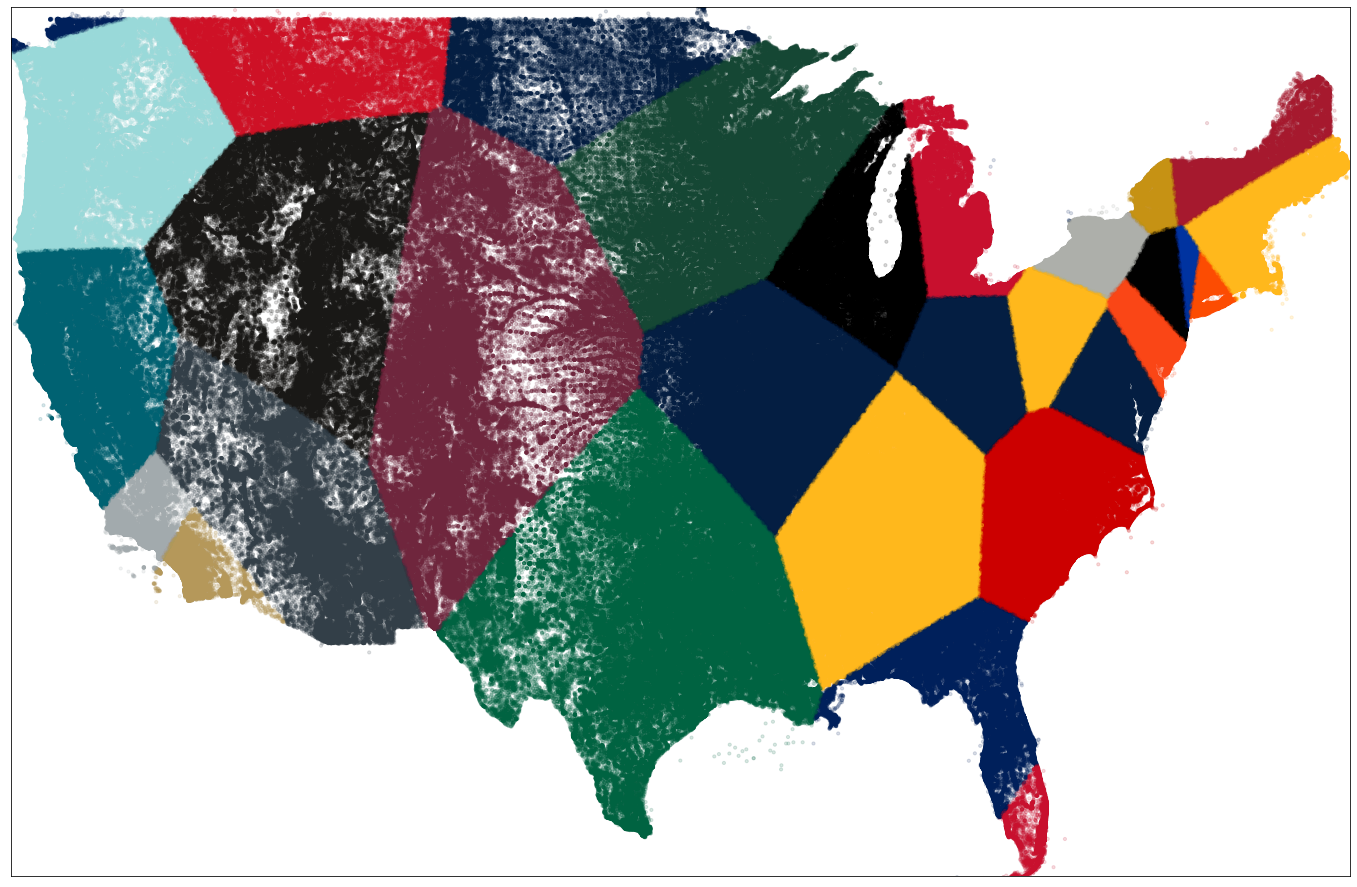

In [11]:
# Iterative style; stripes are manual
for yr in [2024, 2023]:
    timer_start = dt.now()
    
    stadia_this_year = [i for i in stadia_alltime if i[4] <= yr and i[5] >= yr]
    print('\n', yr)
    
    # print an alert for changes
    for team in stadia_this_year:
         if yr == team[4]:
            fore_fromhex('New stadium: ' + team[0], team[3])
    
    # get the closest stadium for every geographic point this year        
    closest_team = []
    for index, here in df_points.iterrows():
        min_dist = np.inf
        team_color = ''
        for ls_stadium in stadia_this_year:
            # Meas distances based on pythagorean theorem. There are better ways
#             dist = math.sqrt(
#                 (here[1] - ls_stadium[2])**2
#                 + (here[0] - ls_stadium[1])**2
#                 # lon^2 + lat^2
#             )
            # Haversine great circle distance
            dist = haversine_distance(
                here[0]
                , ls_stadium[1]                
                , here[1]
                , ls_stadium[2]
            )
            if dist < min_dist:
                min_dist = dist
                team_color = ls_stadium[3] # color for now instead
        closest_team.append(team_color)
    
    df_points['closest_team'] = closest_team
    
    for i in stripes:
        if yr >= i[0] and yr <= i[1]:
            print('Stripes')
            i_stripes = df_points[df_points['closest_team'] == i[2]]
            
            # Remove diagonal swathes from whole eligible area
            i_stripes = i_stripes[
                round(i_stripes['latitude'] + i_stripes['longitude'], 0)
                % 2
                == 0
            ]
            
            i_stripes['closest_team'] = i[3]
            df_points.update(i_stripes)     
    
    # Show a full map
    fig, axs = plt.subplots(figsize = (24, 16))
    axs.scatter(df_points['longitude']
               , df_points['latitude']
               , zorder = 1
               , alpha = 0.15
               , c = df_points['closest_team'] # could map to color if 'closest_team' generalized
               , s = 10
              )
                
    axs.set_xlim(BBox[0], BBox[1])
    axs.set_ylim(BBox[2], BBox[3])
    axs.set_yscale('linear')
    axs.set_facecolor = '#EEEEEE'
    
    # TODO: fix
    #     # Add dots for stadiums
    #     plt.scatter(
    #           stadia_this_year[:][2] # west
    #         , stadia_this_year[:][1] # north
    #         , zorder = 1
    #         , alpha = 1
    #         , c = 'black'
    #         , s = 10
    #     )

    plt.xticks([])
    plt.yticks([])
    
    plt.title(
        f'Closest NHL team in {str(yr)} ({leagues})'
        , fontdict = {'fontsize' : 20}
    )
    

    # plt.show()
    
    # REALLY not getting why this isn't different from the next year's closest team
    old_closest = df_points['closest_team']
    
    plt.savefig(
        os.path.join(output_path, str(yr) + ' NHL cities full map.png')
        , transparent = True
    )
    
    print(dt.now() - timer_start)
    del timer_start

In [13]:
import glob
from PIL import Image

def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}\\*.PNG")]
    frame_one = frames[0]
    frame_one.save(
          "Closest NHL City.gif"
        , format = "GIF"
        , append_images=frames
        , save_all=True
        , duration=588 # 1 minute runtime for 102 frames
        , loop=0
    )

In [ ]:
make_gif("C:\\Users\\Admin\\Desktop\\NHL gif")

KeyError: 2

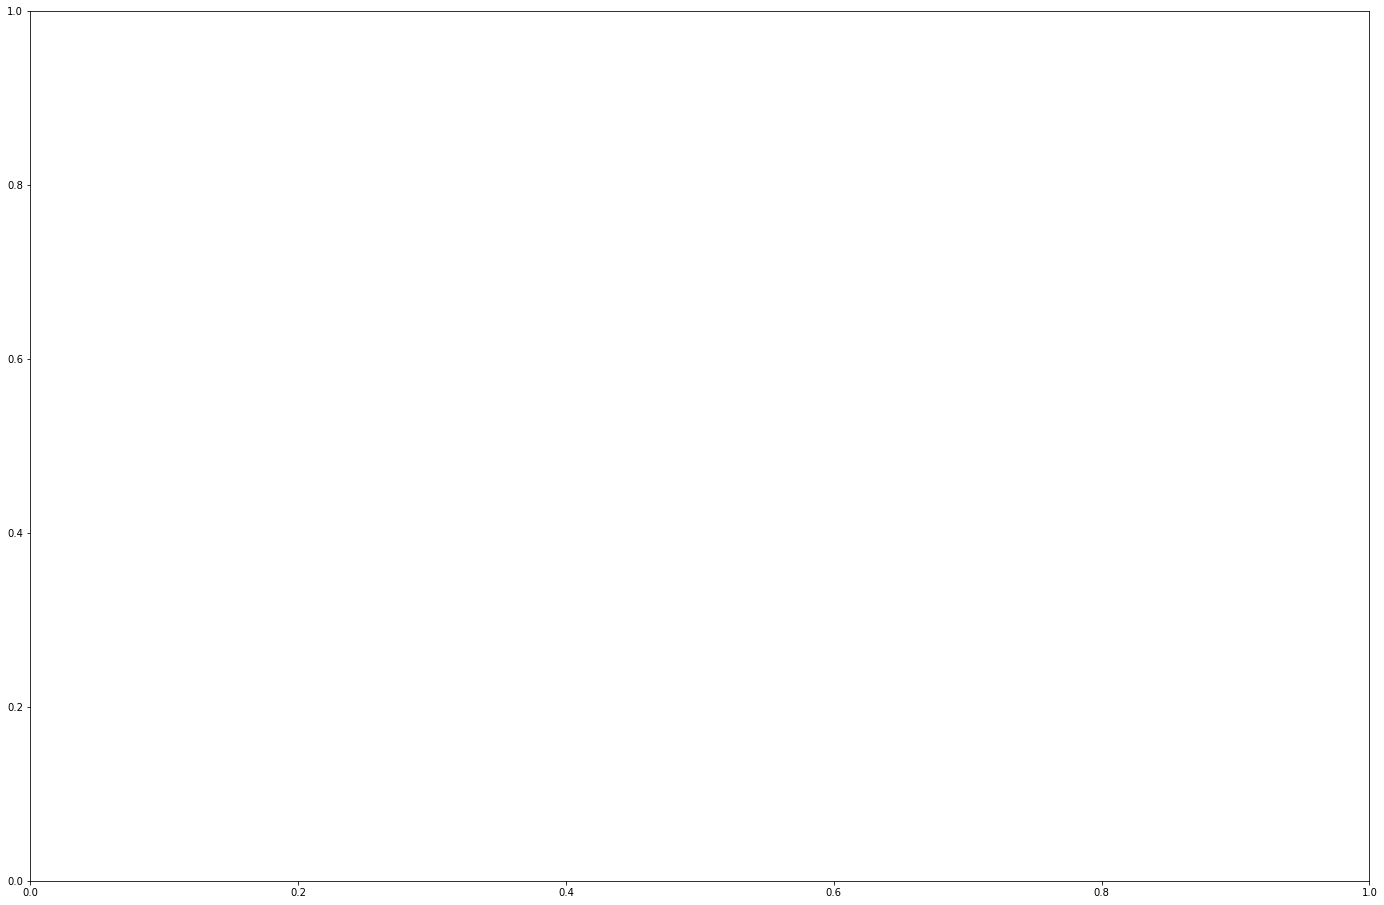

In [14]:
# TODO: Integrate with this visibile on top of full color map

# Plot layer with just points for stadium location
#for yr in range(1920, 2021, 10):
for yr in [1955, 2019, 2020, 2021, 2024]:
    stadia_this_year = pd.DataFrame(
        [i for i in stadia_alltime if i[4] <= yr and i[5] >= yr]
    )
    
    fig, axs = plt.subplots(figsize = (24, 16))
    plt.scatter(stadia_this_year[:][2] # west
                   , stadia_this_year[:][1] # north
                   , zorder = 1
                   , alpha = 1
                   , c = 'black'
                   , s = 10
               )

    axs.set_title('NHL Cities')
    axs.set_xlim(BBox[0], BBox[1])
    axs.set_ylim(BBox[2], BBox[3])
    axs.set_yscale('linear')

    plt.show()